## 1. Load Titanic Datasetsm

In [1]:
import pandas as pd

train = pd.read_csv('titanic/train.csv', index_col='PassengerId')
print(train.shape)
print(train.info())
train.head()

(891, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
test = pd.read_csv('titanic/test.csv', index_col='PassengerId')
# test.csv는 survived 컬럼이 존재하지않아서 컬럼의 개수가 10개
print(test.shape)
print(test.info())
test.head()

(418, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# null data counting
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

## 2. Data PreProcessing (데이터 전처리)
* 문자열 데이터를 숫자로 변환
* One Hot Encoding
* null data 처리

## 2.1 성별(Sex) Encoding
* 'male' => 0, 'female' => 1

In [5]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [6]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
# Sex 컬럼의 값을 변경
train.loc[train['Sex'] == 'male', 'Sex'] = 0
train.loc[train['Sex'] == 'female', 'Sex'] = 1

train['Sex'].unique()

array([0, 1], dtype=object)

In [8]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Sex 컬럼의 값을 변경
test.loc[test['Sex'] == 'male', 'Sex'] = 0
test.loc[test['Sex'] == 'female', 'Sex'] = 1

test['Sex'].unique()

array([0, 1], dtype=object)

## 2.2 Fare 컬럼의 null data 처리 (test)

In [10]:
test.loc[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S


In [11]:
test.loc[test['Fare'].isnull(), 'Fare'] = 0

## 2.3 Embarked 컬럼 처리
* One Hot Encoding
* C=0, S=1, Q=2 (X)
* C = [True, False, False], S = [False, True, False], Q = [False, False, True]
* Embarked_C, Embarked_S, Embarked_Q 컬럼 3개 추가함

In [12]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_Q'] = train['Embarked'] == 'Q'

print(train.shape)
train[['Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q']].head()

(891, 14)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [14]:
train[['Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q']].tail()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
887,S,False,True,False
888,S,False,True,False
889,S,False,True,False
890,C,True,False,False
891,Q,False,False,True


In [15]:
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_Q'] = test['Embarked'] == 'Q'

print(test.shape)
test[['Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q']].head()

(418, 13)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


## 2.4 Age 컬럼 처리
* null 값을 전체 나이의 평균값을 계산해서 채워넣기

In [16]:
mean_age = train['Age'].mean()
mean_age

29.69911764705882

In [17]:
# Age 컬럼의 값이 null row를 평균 나이로 수정하기
train.loc[train['Age'].isnull(), 'Age'] = mean_age
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Cabin       204 non-null    object 
 10  Embarked    889 non-null    object 
 11  Embarked_C  891 non-null    bool   
 12  Embarked_S  891 non-null    bool   
 13  Embarked_Q  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [18]:
test_mean_age = test['Age'].mean()
test.loc[test['Age'].isnull(), 'Age'] = test_mean_age
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Name        418 non-null    object 
 2   Sex         418 non-null    object 
 3   Age         418 non-null    float64
 4   SibSp       418 non-null    int64  
 5   Parch       418 non-null    int64  
 6   Ticket      418 non-null    object 
 7   Fare        418 non-null    float64
 8   Cabin       91 non-null     object 
 9   Embarked    418 non-null    object 
 10  Embarked_C  418 non-null    bool   
 11  Embarked_S  418 non-null    bool   
 12  Embarked_Q  418 non-null    bool   
dtypes: bool(3), float64(2), int64(3), object(5)
memory usage: 37.1+ KB


## 3. Data Visualization(시각화)
* countplot - 막대그래프, X 축이나 Y축 중에서 하나만 설정할 수 있다.
* barplot - 막대그래프, X축이나 Y축 둘다 설정할 수 있다.
* pointplot - 선그래프
* distplot - 히스토그램(분포도)
* lmplot - 산점도(scatter plot)

In [19]:
%matplotlib inline

import seaborn as sns

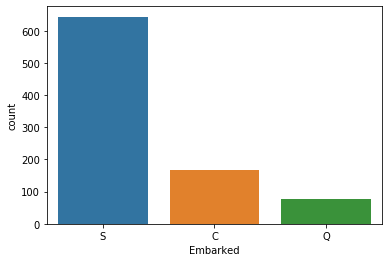

In [20]:
# Embarked 컬럼에 대해서 countplot
sns.countplot(data=train, x='Embarked')

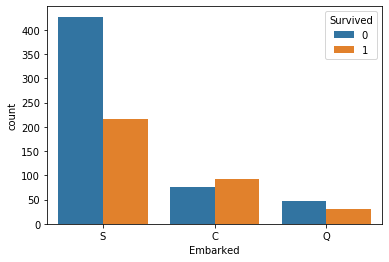

In [21]:
# 생존여부와 Embarked 컬럼의 연관성
sns.countplot(data=train, x='Embarked', hue='Survived')

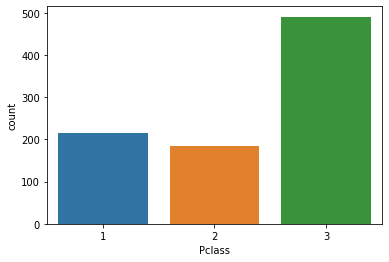

In [22]:
sns.countplot(data=train, x='Pclass')

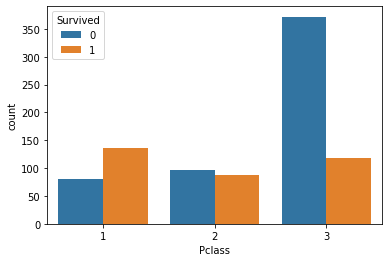

In [23]:
sns.countplot(data=train, x='Pclass', hue='Survived')

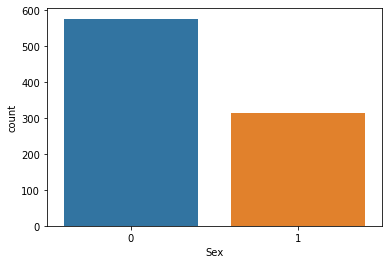

In [24]:
sns.countplot(data=train, x='Sex')

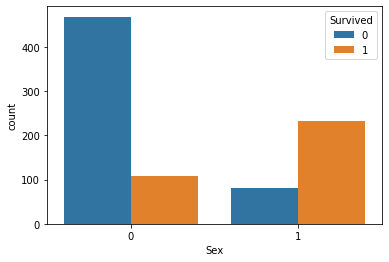

In [25]:
sns.countplot(data=train, x='Sex', hue='Survived')

In [26]:
import warnings
warnings.filterwarnings(action='ignore')

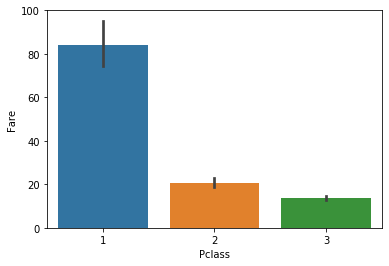

In [27]:
# Pclass와 Fare와의 연관관계
sns.barplot(data=train, x='Pclass', y='Fare')

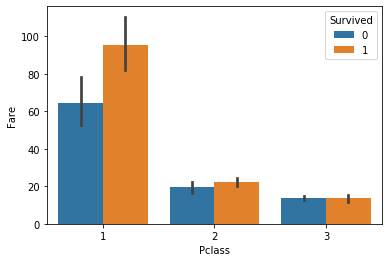

In [28]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

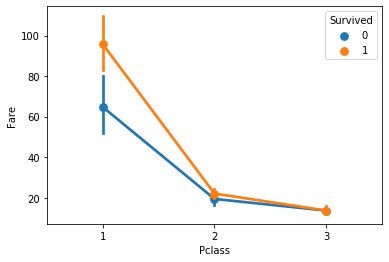

In [29]:
sns.pointplot(data=train, x='Pclass', y='Fare', hue='Survived')

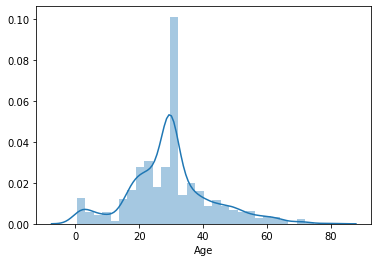

In [30]:
sns.distplot(train['Age'], hist=True)

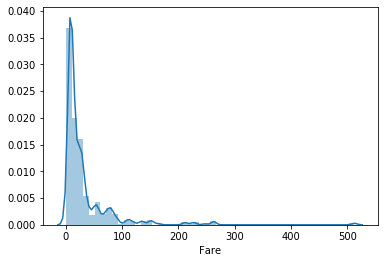

In [31]:
sns.distplot(train['Fare'], hist=True)

(838, 14)


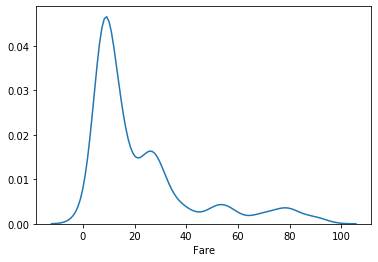

In [32]:
# Fare가 100달러 보다 작은 데이터 추출
low_fare = train.loc[train['Fare'] < 100]
print(low_fare.shape)
sns.distplot(low_fare['Fare'], hist=False)

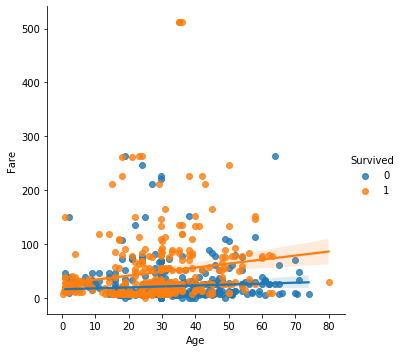

In [33]:
sns.lmplot(data=train, x='Age', y='Fare', hue='Survived')

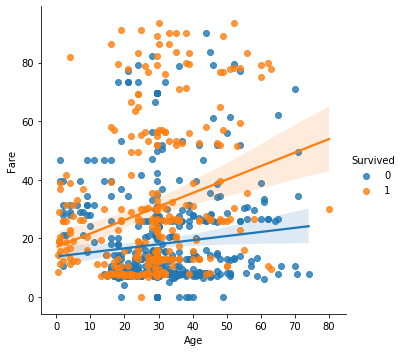

In [34]:
sns.lmplot(data=low_fare, x='Age', y='Fare', hue='Survived')

## 4. Train Engineering
* Feature Engineering
    * Model에서 사용할 feature들을 추출하기
* X_train, y_train, X_test 생성하기
* Decision Tree(의사결정트리) 알고리즘: DecisionTreeClassfier 클래스 사용

In [35]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q'],
      dtype='object')

In [36]:
feature_names=['Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_S', 'Embarked_Q']
feature_names

['Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_S', 'Embarked_Q']

In [37]:
# X_train 생성
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(891, 6)


,Pclass,Sex,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
1,3,0,7.2500,False,True,False
2,1,1,71.2833,True,False,False
3,3,1,7.9250,False,True,False
4,1,1,53.1000,False,True,False
5,3,0,8.0500,False,True,False


In [38]:
# X_test 생성
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(418, 6)


,Pclass,Sex,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
892,3,0,7.8292,False,False,True
893,3,1,7.0000,False,True,False
894,2,0,9.6875,False,False,True
895,3,0,8.6625,False,True,False
896,3,1,12.2875,False,True,False


In [39]:
# y_train 생성
label_name = 'Survived'
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [40]:
# Decision Tree 알고리즘 객체 생성
from sklearn.tree import DecisionTreeClassifier

# depth 깊이를 설정: 적절하게 줘야 정확하게 측정 가능
model = DecisionTreeClassifier(max_depth=5)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
# 학습하기
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
!pip install graphviz

In [43]:
!pip show graphviz

Name: graphviz
Version: 0.14.1
Summary: Simple Python interface for Graphviz
Home-page: https://github.com/xflr6/graphviz
Author: Sebastian Bank
Author-email: sebastian.bank@uni-leipzig.de
License: MIT
Location: c:\anaconda3\lib\site-packages
Requires: 
Required-by: 


In [54]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, feature_names=feature_names, class_names=['Perished','Survived'], out_file='decision-tree.dot')

with open('decision-tree.dot') as file:
    dot_graph = file.read()

graphviz.Source(dot_graph)

Format: "svg" not recognized. Use one of:


CalledProcessError: Command '['dot', '-Tsvg']' returned non-zero exit status 1. [stderr: b'Format: "svg" not recognized. Use one of:\r\n']

In [45]:
# 예측하기

preditions = model.predict(X_test)

print(preditions.shape)
preditions

(418,)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## 5. Submission(제출하기)

In [46]:
submit = pd.read_csv('titanic/gender_submission.csv', index_col='PassengerId')
print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [47]:
submit['Survived'] = preditions

print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [48]:
# 제출할 csv file 생성하기
submit.to_csv('titanic/titanic01.csv')